In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import numpy as np
from scipy.io import wavfile

In [3]:
# Use relative paths
data_fp = '../../data/raw_data/zenodo.4008297/B_ANI01_MC_FN_SIM01_101.wav'

In [4]:
rate, data = wavfile.read(data_fp)

/var/folders/2s/1wkfx2cd65169xd77m_hy0pm0000gq/T/ipykernel_38227/3367578026.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read(data_fp)


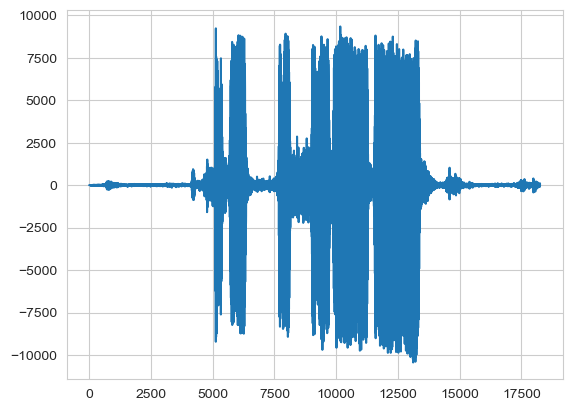

In [5]:
plt.plot(
    np.arange(data.size),
    data,
)

In [14]:
import librosa
import librosa.display

In [15]:
datalib, ratelib = librosa.load(data_fp, sr=None)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


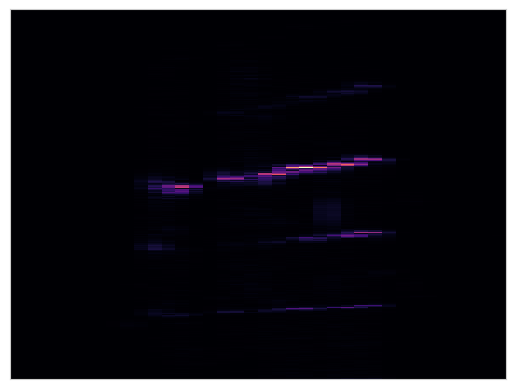

In [17]:
specgram = librosa.stft(datalib)
librosa.display.specshow(specgram)

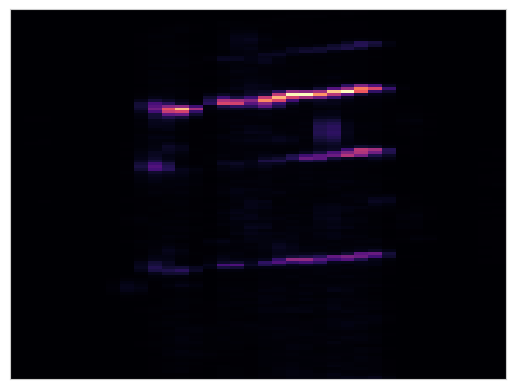

In [19]:
specmag,_ = librosa.magphase(specgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=specmag,sr=ratelib)
librosa.display.specshow(mel_scale_sgram)

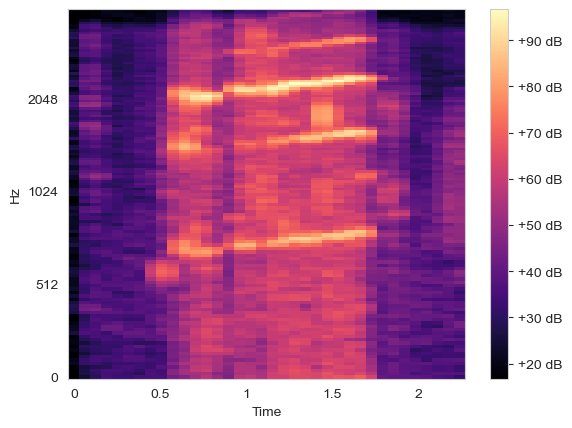

In [20]:
mel_spec_db = librosa.amplitude_to_db(mel_scale_sgram,ref=np.min)
librosa.display.specshow(mel_spec_db, sr = ratelib, x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')